In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import yaml
plt.style.use("../science.mplstyle")

from helpers.plotting import feature_labels, feature_bins
from helpers.physics_functions import get_bins
from helpers.stats_functions import parametric_fit, curve_fit_m_inv, calculate_test_statistic

In [56]:
with open("workflow.yaml", "r") as file:
    workflow = yaml.safe_load(file)
    
project_id = "lowmass"
particle_type = "upsilon"
data_id = "skimmed_data_2016H_30555"


path_to_data_dir = workflow["file_paths"]["data_storage_dir"]
path_to_data = f"{path_to_data_dir}/compiled_data/{project_id}"

with open(f"{path_to_data}/{data_id}_nojet", "rb") as input_file:
        all_data = pickle.load(input_file)


In [57]:
trigger_list = [x for x in all_data.keys() if (("HLT" in x) and ("samesign" not in x) and ("Triple" not in x))]
#print(trigger_list)

all_events_OS = len(all_data["dimu_mass"])
all_events_SS = len(all_data["dimu_mass_samesign"])

num_pass = []
percent_pass = []

for trig in trigger_list:
    masses_OS = all_data["dimu_mass"]
    masses_SS = all_data["dimu_mass_samesign"]
    num_events_pass_OS = len(masses_OS[all_data[trig]])
    num_pass.append(num_events_pass_OS)
    percent_pass.append(round(100*num_events_pass_OS/all_events_OS, 2))
    
indices = np.argsort(percent_pass)


In [58]:
for i in indices[::-1]:
    
    line = trigger_list[i] + ": " + str(num_pass[i]) + " pass , "+  str(percent_pass[i])+"%"
    print(line)

HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ: 13145418 pass , 60.29%
HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ: 12596273 pass , 57.77%
HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ: 12348100 pass , 56.63%
HLT_Mu30_TkMu11: 8182538 pass , 37.53%
HLT_Mu40_TkMu11: 5718117 pass , 26.23%
HLT_Mu27_TkMu8: 5133996 pass , 23.55%
HLT_DoubleMu33NoFiltersNoVtx: 3714910 pass , 17.04%
HLT_L2DoubleMu28_NoVertex_2Cha_Angle2p5_Mass10: 3040504 pass , 13.94%
HLT_DoubleMu38NoFiltersNoVtx: 2308058 pass , 10.59%
HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5_Mass10: 1472489 pass , 6.75%
HLT_DoubleMu8_Mass8_PFHT300: 974960 pass , 4.47%
HLT_Mu20_Mu10: 683876 pass , 3.14%
HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL: 680116 pass , 3.12%
HLT_Mu20_Mu10_DZ: 655966 pass , 3.01%
HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL: 653812 pass , 3.0%
HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL: 632767 pass , 2.9%
HLT_TrkMu15_DoubleTrkMu5NoFiltersNoVtx: 557181 pass , 2.56%
HLT_Mu17_Mu8: 547990 pass , 2.51%
HLT_Mu17_Mu8_DZ: 520961 pass , 2.39%
HLT_Mu17_Mu8_SameSign_DZ: 497542 pas

# Triggering studies

In [59]:
pt_cuts_dir = {
    "HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ": [20, 11],
    "HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ": [20, 11],
    "HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ": [20, 11],
    "HLT_Mu30_TkMu11": [33, 14],
    "HLT_Mu40_TkMu11": [43, 14],
    "HLT_Mu27_TkMu8": [30, 11],
    "HLT_DoubleMu33NoFiltersNoVtx": [36, 36],
    "HLT_L2DoubleMu28_NoVertex_2Cha_Angle2p5_Mass10": [31, 31],
    "HLT_TripleMu_5_3_3_DZ_Mass3p8": [8, 6],
    "HLT_DoubleMu38NoFiltersNoVtx": [41, 41],
    "HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5_Mass10": [41, 41],
    "HLT_TripleMu_12_10_5": [15, 13],
    "HLT_DoubleMu8_Mass8_PFHT300": [11, 11],
    "HLT_Mu20_Mu10": [23, 13],
    "HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL": [20, 11],
    "HLT_Mu20_Mu10_DZ": [23, 13],
    "HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL": [20, 11],
    "HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL": [20, 11],
    "HLT_TrkMu15_DoubleTrkMu5NoFiltersNoVtx": [18, 8],
    "HLT_Mu17_Mu8": [20, 11],
    "HLT_Mu17_Mu8_DZ": [20, 11],
    "HLT_Mu17_Mu8_SameSign_DZ": [20, 11],
    "HLT_TrkMu17_DoubleTrkMu8NoFiltersNoVtx": [20, 11],
    "HLT_Mu17_TkMu8_DZ": [20, 11],
    "HLT_DoubleMu23NoFiltersNoVtxDisplaced": [26, 26],
    "HLT_Mu10_CentralPFJet30_BTagCSV_p13": [13, 13],
    "HLT_Mu20_Mu10_SameSign_DZ": [23, 23],
    "HLT_DoubleMu0": [3, 3],
    "HLT_DoubleMu18NoFiltersNoVtx": [21, 21],
    "HLT_L2DoubleMu23_NoVertex": [26, 26],
    "HLT_DoubleMu28NoFiltersNoVtxDisplaced": [31, 31],
    "HLT_Mu17": [20, 20],
    "HLT_Mu17_TrkIsoVVL": [20, 20],
    "HLT_Mu8_TrkIsoVVL": [11, 11],
    "HLT_Mu20_Mu10_SameSign": [23, 13],
    "HLT_Mu3_PFJet40": [6, 6],
    "HLT_Mu8": [11, 11],
    "HLT_Mu17_Mu8_SameSign": [20, 11],
    "HLT_DoubleMu8_Mass8_PFHT250": [11, 11],
    "HLT_TripleMu_5_3_3": [8, 6],
}


## upsilon

In [60]:
SB_left = float(workflow["window_definitions"][particle_type]["SB_left"])
SR_left = float(workflow["window_definitions"][particle_type]["SR_left"])
SR_right = float(workflow["window_definitions"][particle_type]["SR_right"])
SB_right = float(workflow["window_definitions"][particle_type]["SB_right"])


num_pass_upsilon_only = []

for trig in trigger_list:

    pt_high_cut = pt_cuts_dir[trig][0]
    pt_low_cut =  pt_cuts_dir[trig][1]
    eta_cut = 20
    
    pass_trigger_cuts = (all_data["dimu_mass"] >= SB_left) & (all_data["dimu_mass"] <= SB_right)& (all_data["mu0_pt"] >= pt_high_cut)& (all_data["mu1_pt"] >= pt_low_cut)& (np.abs(all_data["mu0_eta"]) <= eta_cut)& (np.abs(all_data["mu1_eta"]) <= eta_cut)
    N = all_data["dimu_mass"][pass_trigger_cuts][all_data[trig][pass_trigger_cuts]]
    num_pass_upsilon_only.append(len(N))
    
indices_upsilon_only = np.argsort(num_pass_upsilon_only)


for i in indices_upsilon_only[::-1]:
    
    line = trigger_list[i].ljust(50) + ": " + str(num_pass_upsilon_only[i]) + " events between " + str(SB_left) + ", " + str(SB_right) + " (mu0_pt > " +str(pt_cuts_dir[trigger_list[i]][0])+ ", mu1_pt > "+ str(pt_cuts_dir[trigger_list[i]][1]) + ")"
    print(line)



HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ           : 322312 events between 5.0, 16.0 (mu0_pt > 20, mu1_pt > 11)
HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ             : 322175 events between 5.0, 16.0 (mu0_pt > 20, mu1_pt > 11)
HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ               : 298597 events between 5.0, 16.0 (mu0_pt > 20, mu1_pt > 11)
HLT_Mu30_TkMu11                                   : 89186 events between 5.0, 16.0 (mu0_pt > 33, mu1_pt > 14)
HLT_Mu27_TkMu8                                    : 83973 events between 5.0, 16.0 (mu0_pt > 30, mu1_pt > 11)
HLT_DoubleMu0                                     : 71504 events between 5.0, 16.0 (mu0_pt > 3, mu1_pt > 3)
HLT_DoubleMu8_Mass8_PFHT300                       : 68021 events between 5.0, 16.0 (mu0_pt > 11, mu1_pt > 11)
HLT_Mu40_TkMu11                                   : 42097 events between 5.0, 16.0 (mu0_pt > 43, mu1_pt > 14)
HLT_TrkMu15_DoubleTrkMu5NoFiltersNoVtx            : 25234 events between 5.0, 16.0 (mu0_pt > 18, mu1_pt > 8)
HLT_Mu17_T

HLT_Mu30_TkMu11


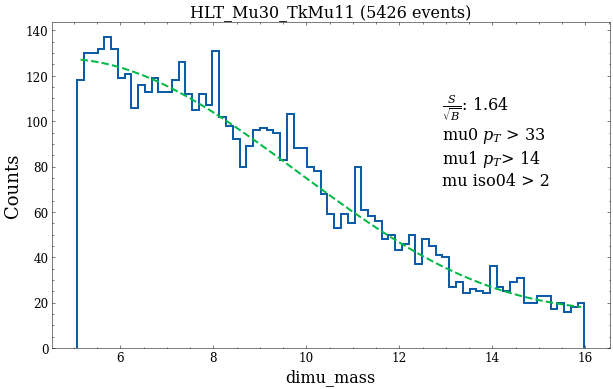

HLT_Mu27_TkMu8


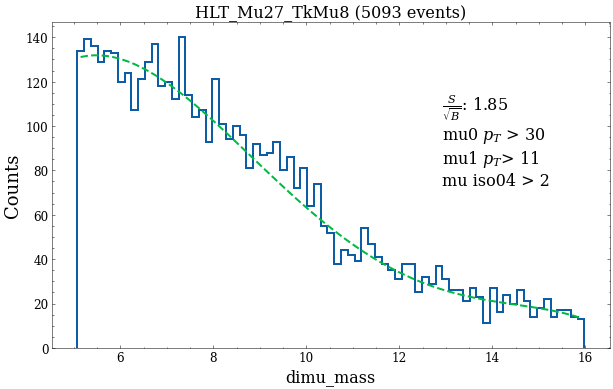

HLT_DoubleMu0


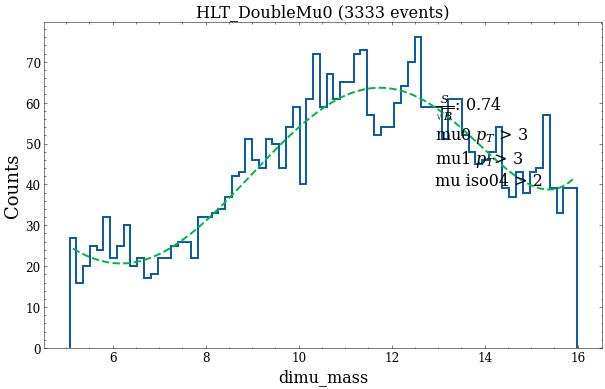

HLT_DoubleMu8_Mass8_PFHT300


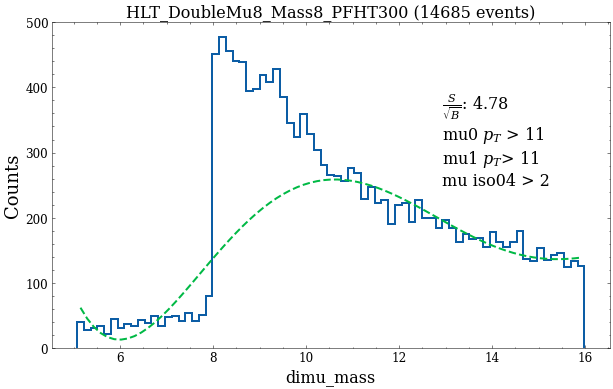

HLT_Mu40_TkMu11


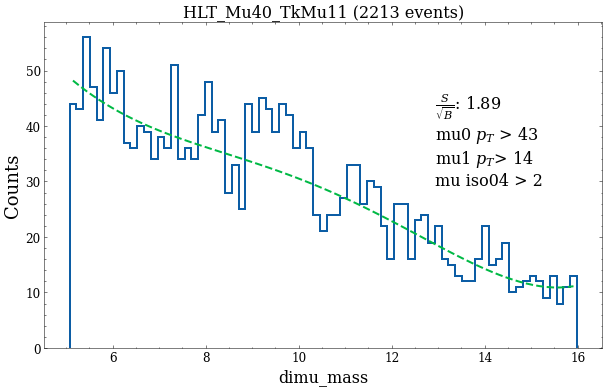

HLT_TrkMu15_DoubleTrkMu5NoFiltersNoVtx


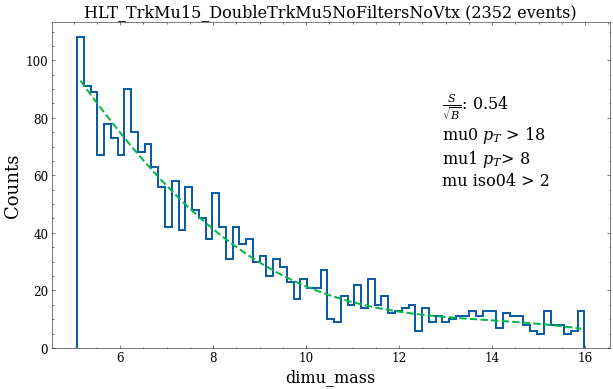

HLT_TrkMu17_DoubleTrkMu8NoFiltersNoVtx


/tmp/ipykernel_370134/3218035967.py:49: RuntimeWarning: invalid value encountered in sqrt
  label_string = "$\\frac{S}{\sqrt{B}}$: "+str(round(np.sqrt(sig_estimated),2))


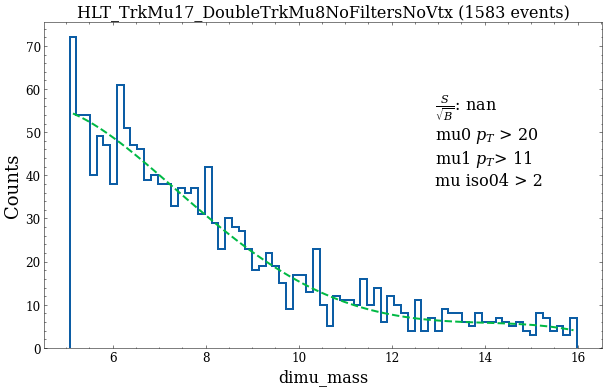

HLT_Mu17_Mu8_SameSign_DZ


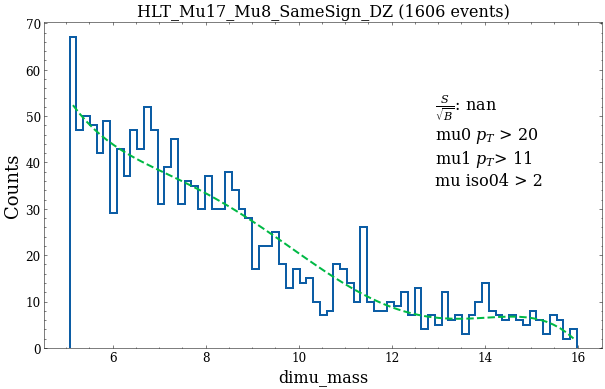

HLT_Mu20_Mu10


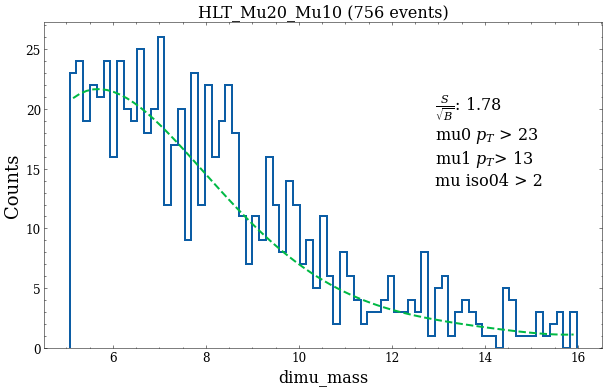

HLT_Mu20_Mu10_DZ


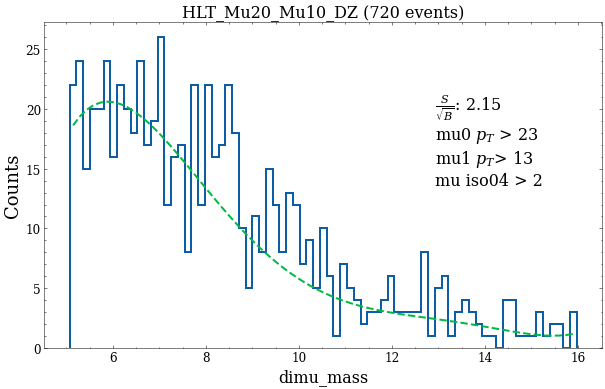

HLT_Mu17_Mu8


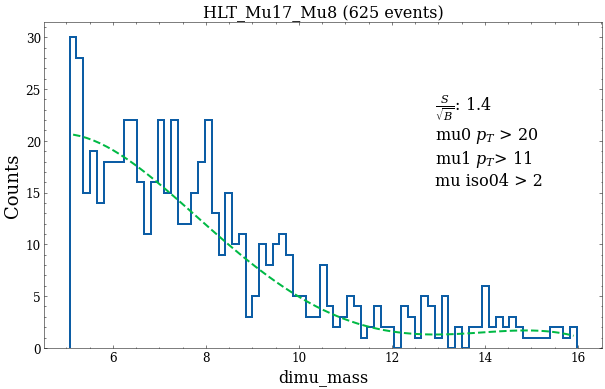

HLT_Mu17_TkMu8_DZ


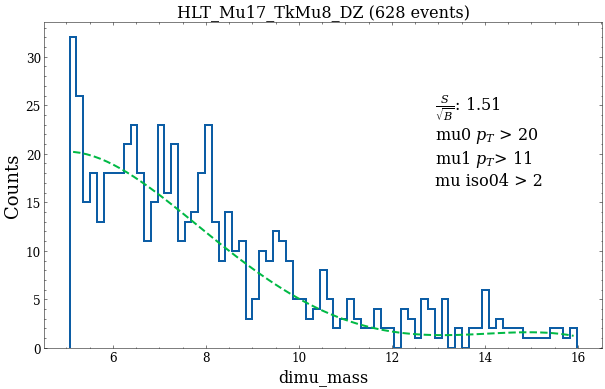

HLT_Mu17_Mu8_DZ


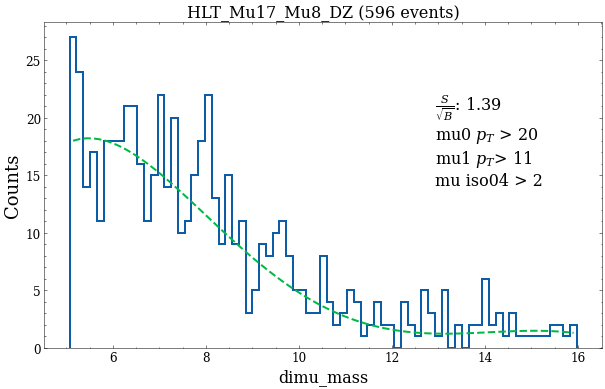

HLT_DoubleMu33NoFiltersNoVtx


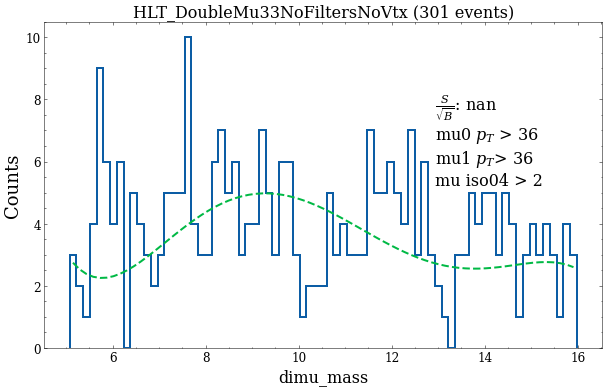

HLT_L2DoubleMu28_NoVertex_2Cha_Angle2p5_Mass10


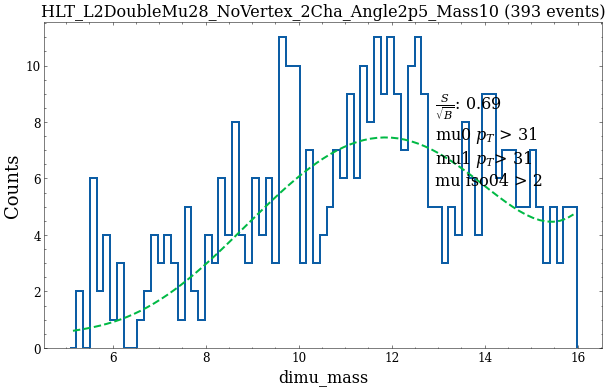

HLT_DoubleMu38NoFiltersNoVtx


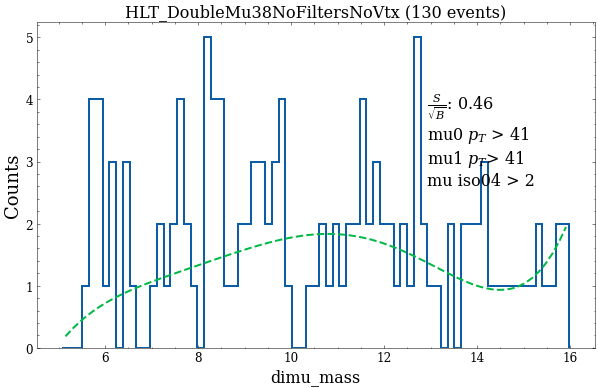

HLT_Mu20_Mu10_SameSign_DZ


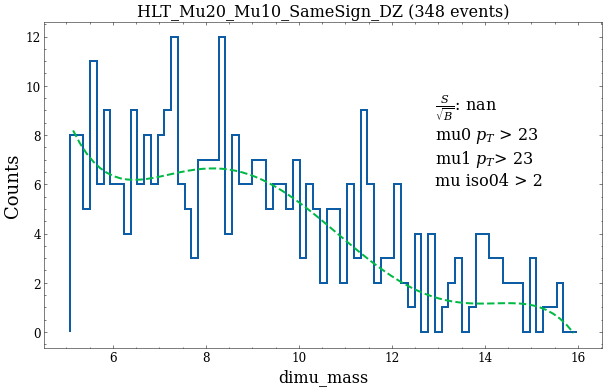

HLT_DoubleMu18NoFiltersNoVtx


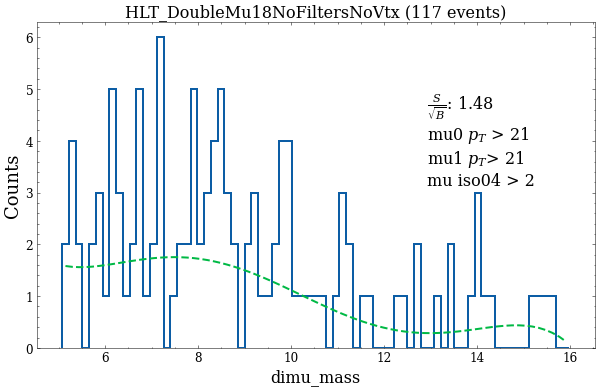

HLT_DoubleMu23NoFiltersNoVtxDisplaced


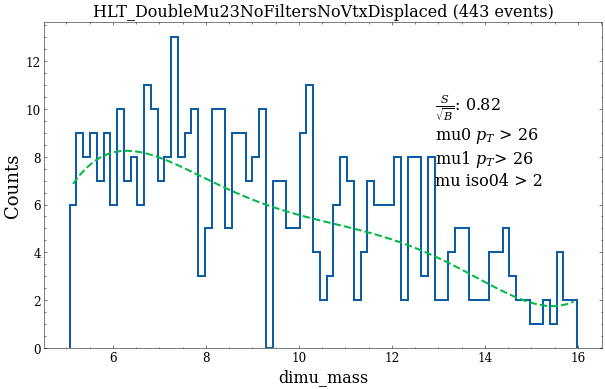

HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5_Mass10


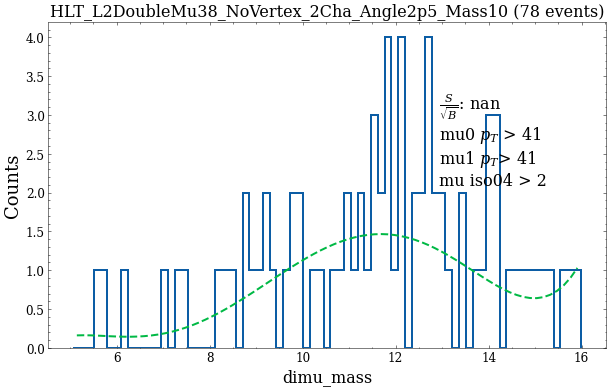

HLT_Mu3_PFJet40


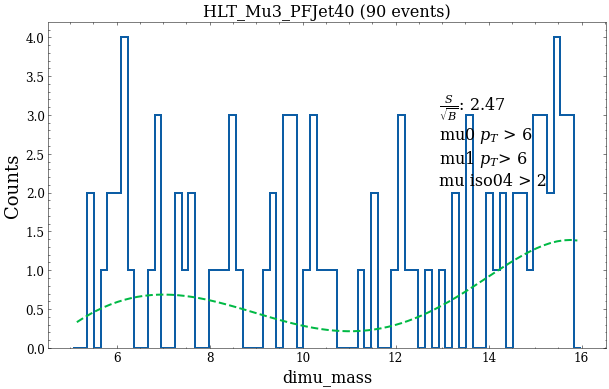

HLT_Mu10_CentralPFJet30_BTagCSV_p13


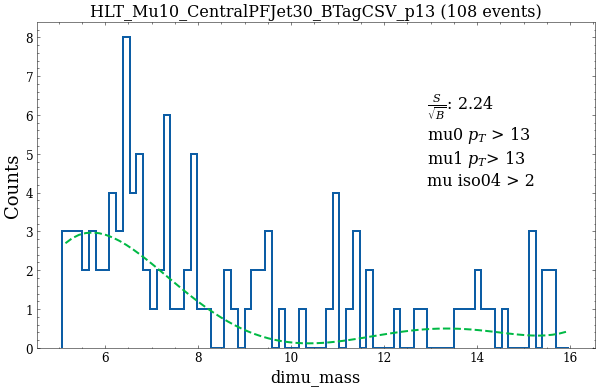

HLT_DoubleMu28NoFiltersNoVtxDisplaced


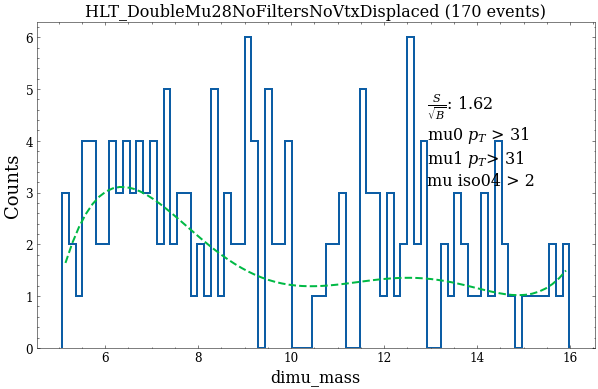

HLT_L2DoubleMu23_NoVertex


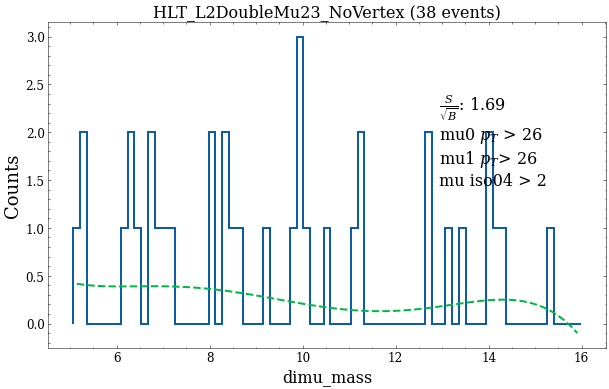

HLT_Mu20_Mu10_SameSign


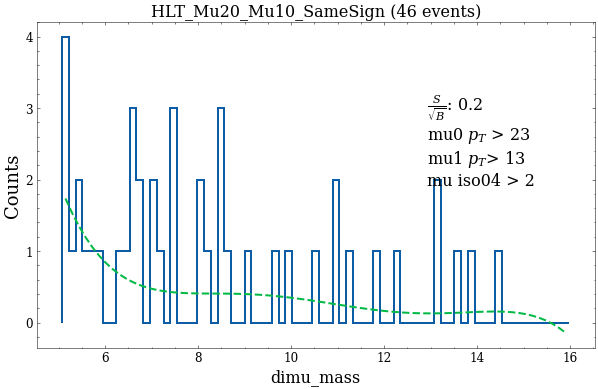

HLT_Mu17_Mu8_SameSign


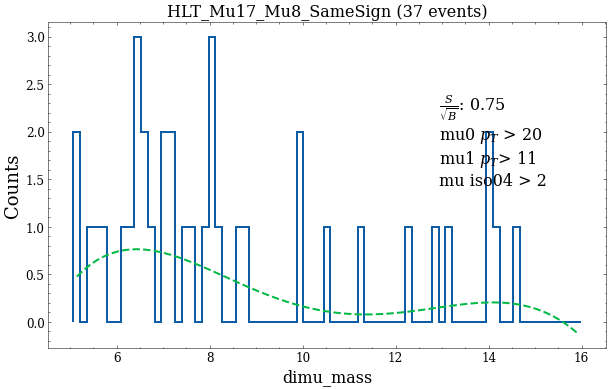

HLT_Mu17


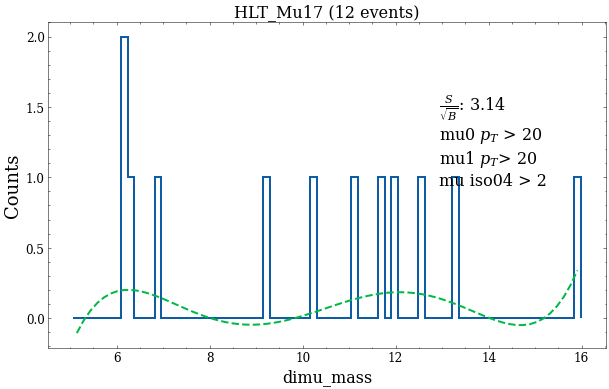

HLT_Mu8


/tmp/ipykernel_370134/3218035967.py:46: RuntimeWarning: invalid value encountered in sqrt
  sig_estimated = S_estimated/np.sqrt(B_estimated)


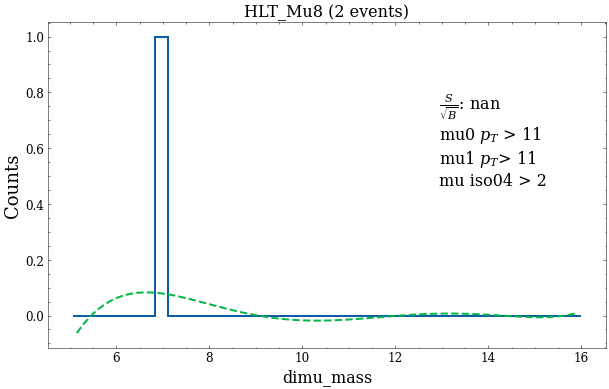

HLT_DoubleMu8_Mass8_PFHT250


/tmp/ipykernel_370134/3218035967.py:46: RuntimeWarning: invalid value encountered in double_scalars
  sig_estimated = S_estimated/np.sqrt(B_estimated)


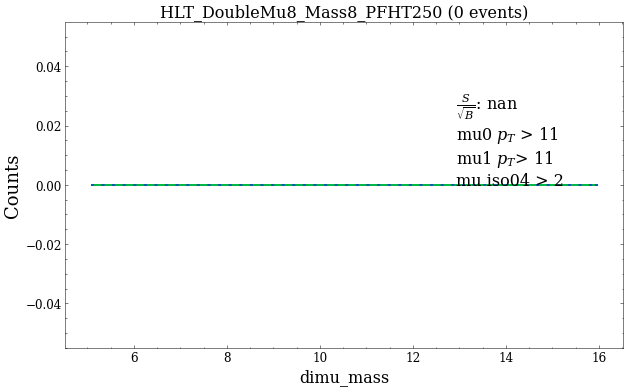

In [69]:


bkg_fit_degree = 5
num_bins_SR = 12
lw = 2
fontsize = 16
plot_bins_all, plot_bins_SR, plot_bins_left, plot_bins_right, plot_centers_all, plot_centers_SR, plot_centers_SB = get_bins(SR_left, SR_right, SB_left, SB_right, num_bins_SR= num_bins_SR)


for i in indices_upsilon_only[::-1]:

    trig = trigger_list[i]

    if "Iso" not in trig:

    

        
        print(trig)
    
        pt_high_cut = pt_cuts_dir[trig][0]
        pt_low_cut =  pt_cuts_dir[trig][1]
        eta_cut = 20
        iso_cut = 2
        
        in_SB = (all_data["dimu_mass"] >= SB_left) & (all_data["dimu_mass"] <= SB_right)& (all_data["mu0_pt"] >= pt_high_cut)& (all_data["mu1_pt"] >= pt_low_cut)& (all_data["mu0_iso04"] >= iso_cut)& (all_data["mu1_iso04"] >= iso_cut)& (np.abs(all_data["mu0_eta"]) <= eta_cut)& (np.abs(all_data["mu1_eta"]) <= eta_cut)
    
        
        vars_to_plot = ["dimu_mass"]
    
        for var in vars_to_plot:
    
            events_all = all_data[var][in_SB]
            events_trig = all_data[var][in_SB][all_data[trig][in_SB]]
    
            plt.figure(figsize = (10,6))
            #plt.hist(events_all, bins = plot_bins_all, label = f"baseline ({len(events_all)} events)", histtype = "step", density = True)
            plt.hist(events_trig, bins = plot_bins_all, label = f"trigger ({len(events_trig)} events)", histtype = "step", density = False, lw=lw)
    
            # get the significance for the triggered events
            popt_0, _, _, _, _ = curve_fit_m_inv(events_trig, bkg_fit_degree, SR_left, SR_right, plot_bins_left, plot_bins_right, plot_centers_SB)
            plt.plot(plot_centers_all, parametric_fit(plot_centers_all, *popt_0), lw = lw, linestyle = "dashed") 
    
            #S, B, q0 = calculate_test_statistic(events_trig, SR_left, SR_right, SB_left, SB_right, num_bins_SR, degree = bkg_fit_degree, starting_guess = popt_0)
            B_estimated = sum(parametric_fit(plot_centers_SR, *popt_0))
            N_total = sum((events_trig >= SR_left) & (events_trig <= SR_right) )
            S_estimated = N_total - B_estimated
            sig_estimated = S_estimated/np.sqrt(B_estimated)
        
            
            label_string = "$\\frac{S}{\sqrt{B}}$: "+str(round(np.sqrt(sig_estimated),2))
    
            label = f"{label_string}\nmu0 $p_T$ > {pt_high_cut}\nmu1 $p_T$> {pt_low_cut}\nmu iso04 > {iso_cut}"
            plt.text(0.7, 0.5, label, transform = plt.gca().transAxes, fontsize=fontsize)
            plt.ylabel("Counts")
            plt.xlabel(var, fontsize=fontsize)
            plt.title(f"{trig} ({len(events_trig)} events)", fontsize=fontsize)
            plt.show()
        
        
        
    


## scan

In [36]:
SB_left = 0.3
SR_left = 0.3
SR_right = 20
SB_right = 20

num_pass_scan_OS, num_pass_scan_SS = [], []


for trig in trigger_list:

    pt_high_cut = pt_cuts_dir[trig][0]
    pt_low_cut =  pt_cuts_dir[trig][1]
    eta_cut = 2.1
    
    pass_trigger_cuts_OS = (all_data[f"dimu_mass"] >= SB_left) & (all_data["dimu_mass"] <= SB_right)& (all_data["mu0_pt"] >= pt_high_cut)& (all_data["mu1_pt"] >= pt_low_cut)& (np.abs(all_data["mu0_eta"]) <= eta_cut)& (np.abs(all_data["mu1_eta"]) <= eta_cut)
    pass_trigger_cuts_SS = (all_data[f"dimu_mass_samesign"] >= SB_left) & (all_data["dimu_mass_samesign"] <= SB_right)& (all_data["mu0_pt_samesign"] >= pt_high_cut)& (all_data["mu1_pt_samesign"] >= pt_low_cut)& (np.abs(all_data["mu0_eta_samesign"]) <= eta_cut)& (np.abs(all_data["mu1_eta_samesign"]) <= eta_cut)

    N_OS = all_data["dimu_mass"][pass_trigger_cuts_OS][all_data[trig][pass_trigger_cuts_OS]]
    N_SS = all_data["dimu_mass_samesign"][pass_trigger_cuts_SS][all_data[f"{trig}_samesign"][pass_trigger_cuts_SS]]
    
    num_pass_scan_OS.append(len(N_OS))
    num_pass_scan_SS.append(len(N_SS))
    
indices_scan_OS = np.argsort(num_pass_scan_OS)
indices_scan_SS = np.argsort(num_pass_scan_SS)





In [39]:
for i in indices_scan_OS[::-1]:
    
    line = trigger_list[i].ljust(50) + ": " + str(num_pass_scan_OS[i]) + " events between " + str(SB_left) + ", " + str(SB_right) + " (mu0_pt > " +str(pt_cuts_dir[trigger_list[i]][0])+ ", mu1_pt > "+ str(pt_cuts_dir[trigger_list[i]][1]) + "),|mu_eta| < "+ str(eta_cut) + ")"
    print(line)

HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ               : 1317746 events between 0.3, 20 (mu0_pt > 20, mu1_pt > 11),|mu_eta| < 2.1)
HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ           : 1296310 events between 0.3, 20 (mu0_pt > 20, mu1_pt > 11),|mu_eta| < 2.1)
HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ             : 957329 events between 0.3, 20 (mu0_pt > 20, mu1_pt > 11),|mu_eta| < 2.1)
HLT_Mu30_TkMu11                                   : 454161 events between 0.3, 20 (mu0_pt > 33, mu1_pt > 14),|mu_eta| < 2.1)
HLT_Mu27_TkMu8                                    : 441206 events between 0.3, 20 (mu0_pt > 30, mu1_pt > 11),|mu_eta| < 2.1)
HLT_DoubleMu0                                     : 220294 events between 0.3, 20 (mu0_pt > 3, mu1_pt > 3),|mu_eta| < 2.1)
HLT_Mu40_TkMu11                                   : 209799 events between 0.3, 20 (mu0_pt > 43, mu1_pt > 14),|mu_eta| < 2.1)
HLT_TrkMu15_DoubleTrkMu5NoFiltersNoVtx            : 167458 events between 0.3, 20 (mu0_pt > 18, mu1_pt > 8),|mu_eta| < 2.1)
H

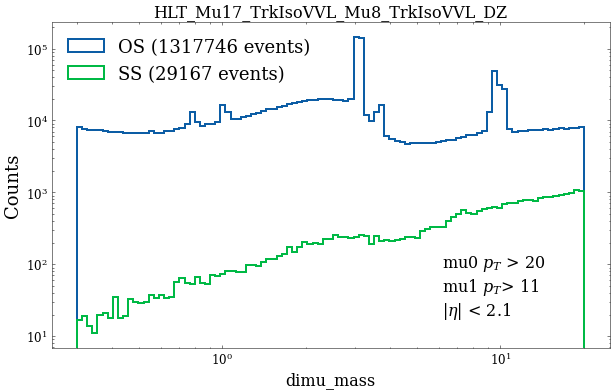

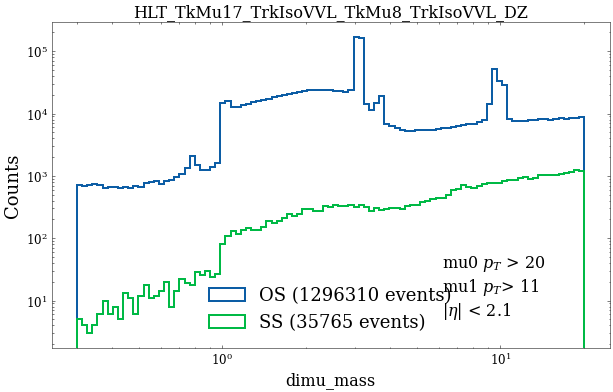

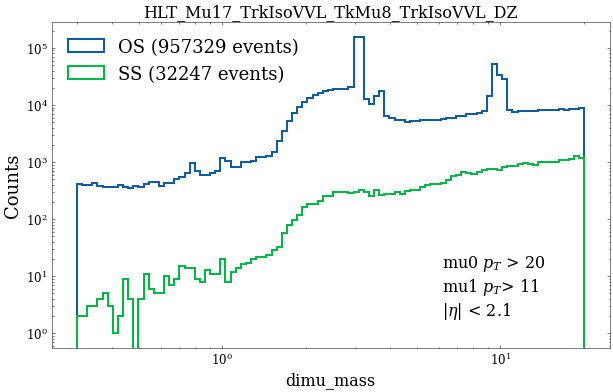

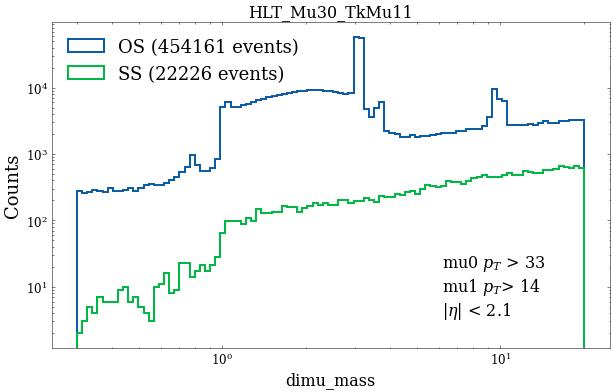

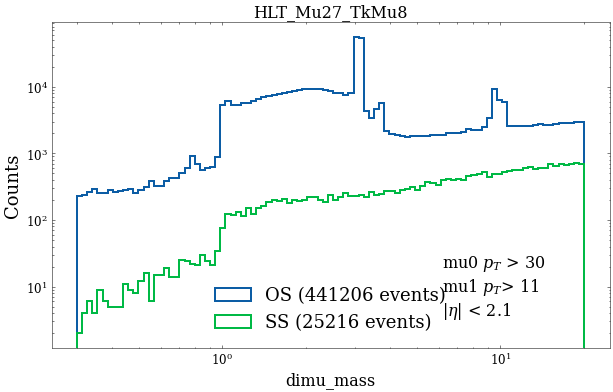

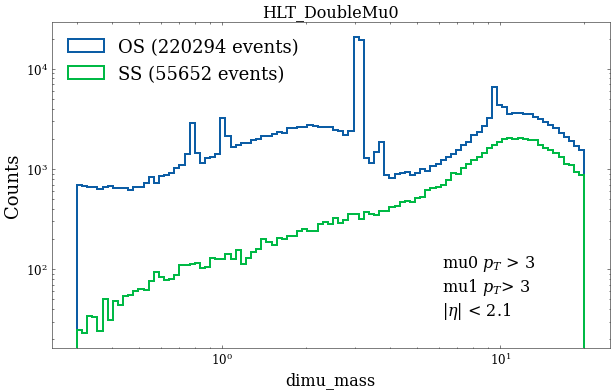

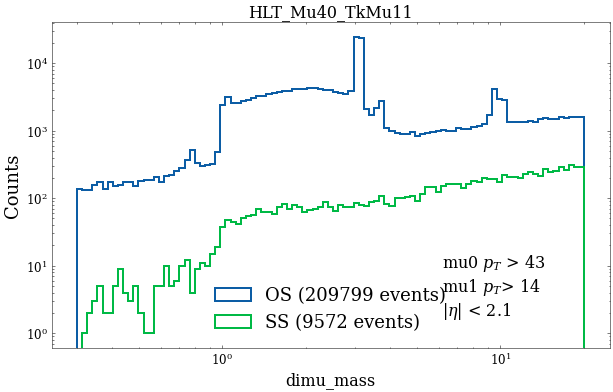

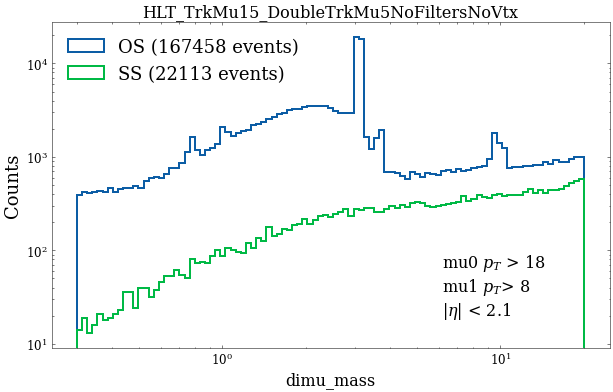

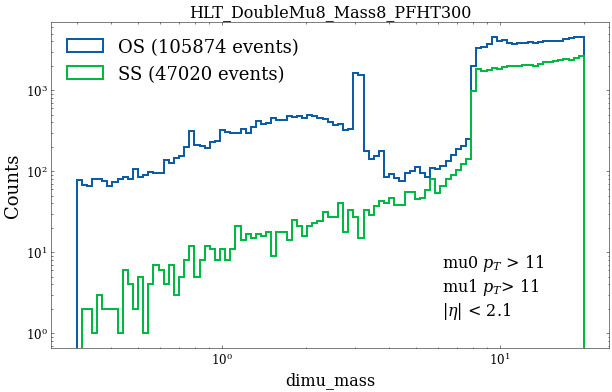

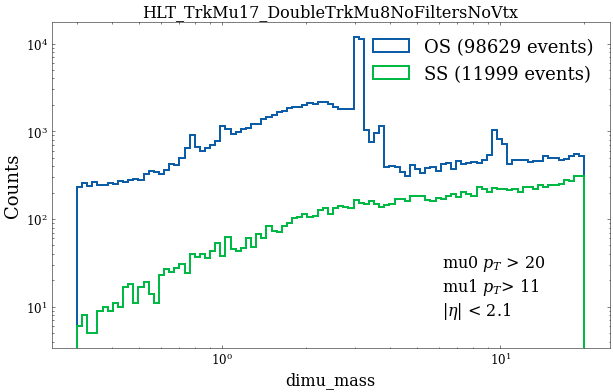

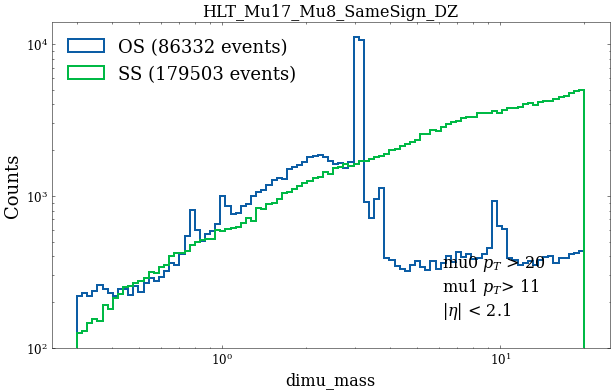

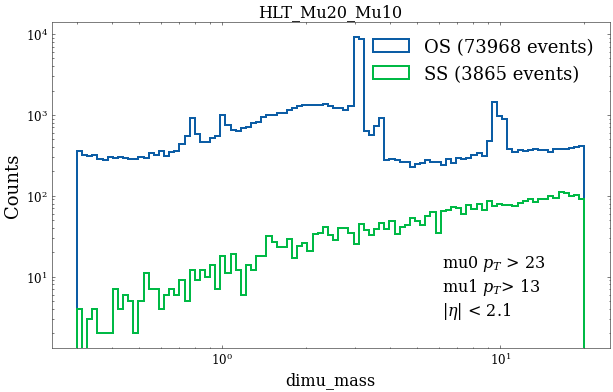

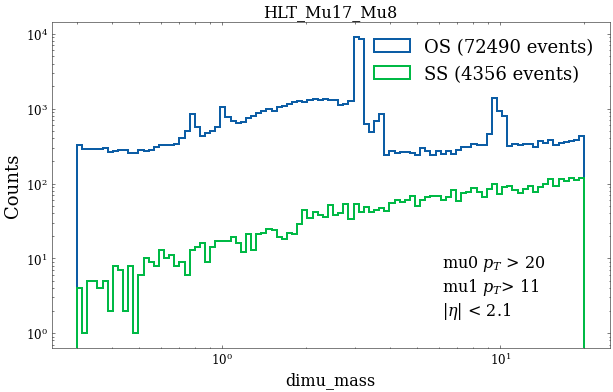

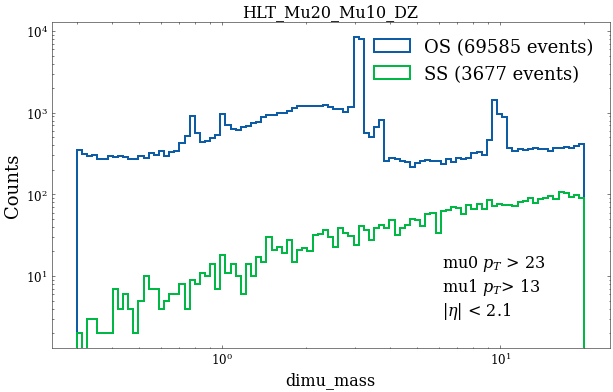

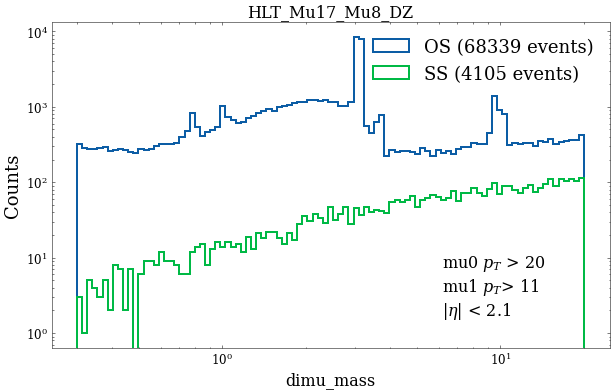

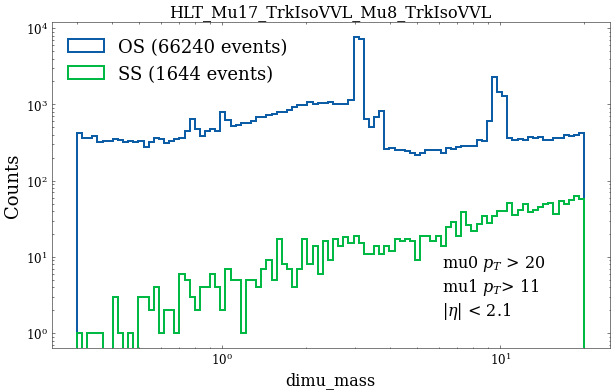

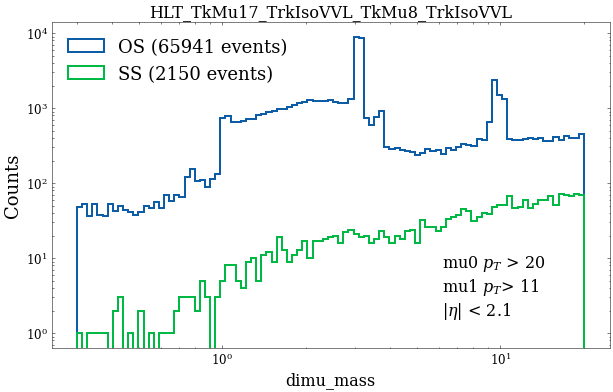

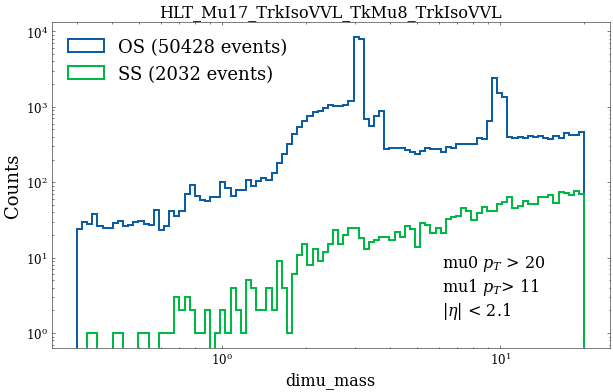

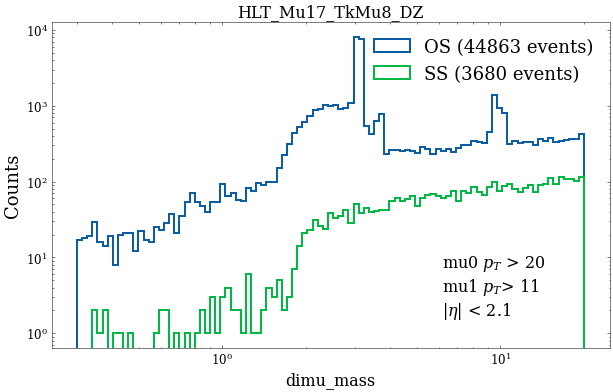

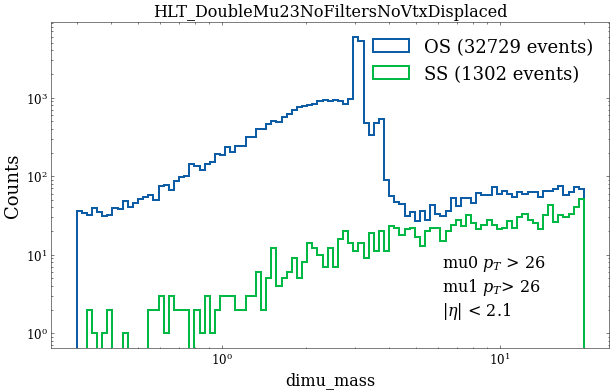

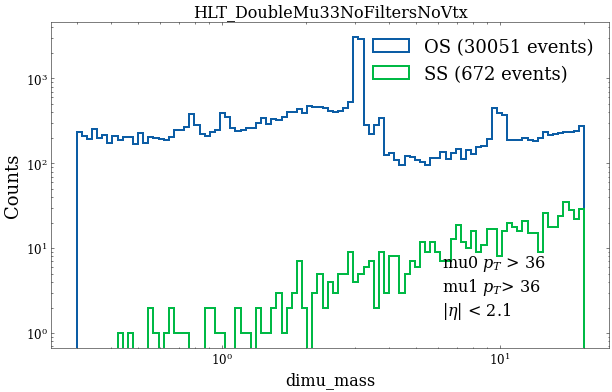

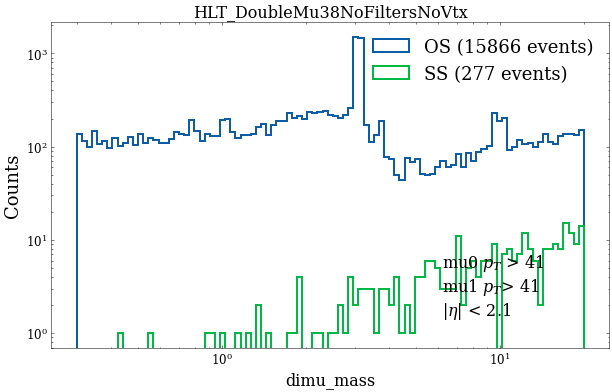

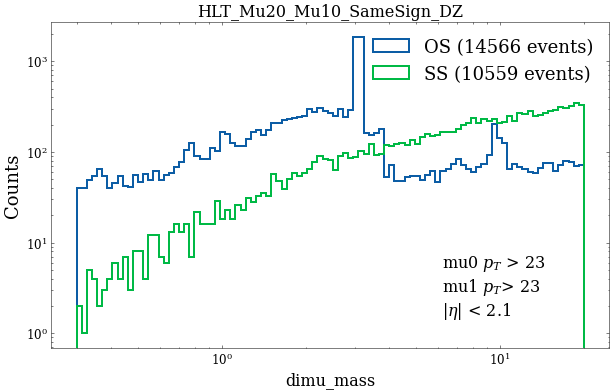

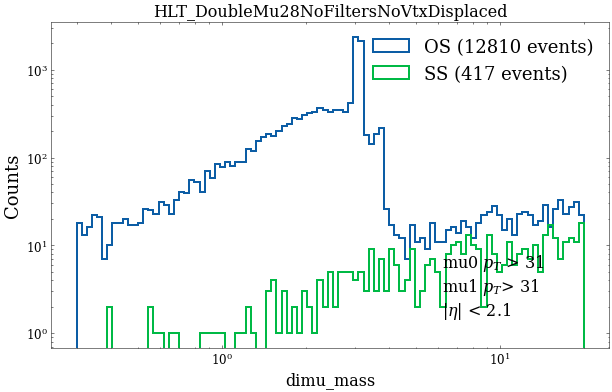

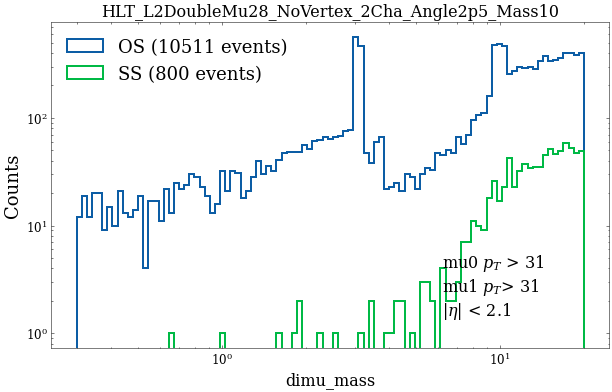

In [53]:

lw=2
fontsize = 16
for i in indices_scan[::-1][:25]:

    trig = trigger_list[i]

    
    pt_high_cut = pt_cuts_dir[trig][0]
    pt_low_cut =  pt_cuts_dir[trig][1]
    eta_cut = 2.1
    
    pass_trigger_cuts_OS = (all_data[f"dimu_mass"] >= SB_left) & (all_data["dimu_mass"] <= SB_right)& (all_data["mu0_pt"] >= pt_high_cut)& (all_data["mu1_pt"] >= pt_low_cut)& (np.abs(all_data["mu0_eta"]) <= eta_cut)& (np.abs(all_data["mu1_eta"]) <= eta_cut)
    pass_trigger_cuts_SS = (all_data[f"dimu_mass_samesign"] >= SB_left) & (all_data["dimu_mass_samesign"] <= SB_right)& (all_data["mu0_pt_samesign"] >= pt_high_cut)& (all_data["mu1_pt_samesign"] >= pt_low_cut)& (np.abs(all_data["mu0_eta_samesign"]) <= eta_cut)& (np.abs(all_data["mu1_eta_samesign"]) <= eta_cut)


    vars_to_plot = ["dimu_mass"]#, "dimu_pt", "mu0_pt", "mu1_pt","mu0_eta","mu0_eta"]
    bins = {
        "dimu_mass": np.logspace(np.log10(0.3), np.log10(20), 100), 
         "dimu_pt": np.linspace(0, 100,60), 
         "mu0_pt": np.linspace(0, 50, 60), 
        "mu1_pt": np.linspace(0, 50, 60) ,
        "mu0_eta": np.linspace(-3, 3, 60), 
           "mu1_eta": np.linspace(-3, 3, 60), }
    

    
    for var in vars_to_plot:

        events_trig_OS = all_data[var][pass_trigger_cuts_OS][all_data[trig][pass_trigger_cuts_OS]]
        events_trig_SS = all_data[f"{var}_samesign"][pass_trigger_cuts_SS][all_data[f"{trig}_samesign"][pass_trigger_cuts_SS]]

        plt.figure(figsize = (10,6))
        #plt.hist(events_all, bins = plot_bins_all, label = f"baseline ({len(events_all)} events)", histtype = "step", density = True)
        plt.hist(events_trig_OS, bins = bins[var], label = f"OS ({len(events_trig_OS)} events)", histtype = "step", density = False, lw=lw)
        plt.hist(events_trig_SS, bins = bins[var], label = f"SS ({len(events_trig_SS)} events)", histtype = "step", density = False, lw=lw)
        

        label_string = f"mu0 $p_T$ > {pt_high_cut}\nmu1 $p_T$> {pt_low_cut}\n|$\eta$| < 2.1"
        plt.text(0.7, 0.1, label_string, transform = plt.gca().transAxes,fontsize=fontsize)
        plt.xscale("log")
        plt.yscale("log")
        plt.ylabel("Counts")
        plt.xlabel(var, fontsize=fontsize)
        plt.title(f"{trig}", fontsize=fontsize)
        plt.legend()
        plt.show()
    
    
    

    
   

# Various kinematic observables

In [ ]:
vars_to_plot = all_data.keys()

for var in vars_to_plot:
    
    if ("samesign" not in var) and ("HLT" not in var):
    
        plt.figure()
        plt.hist(all_data[var], bins = feature_bins[var], histtype = "step", density = True, label = "OS")
        plt.hist(all_data[var+"_samesign"], bins = feature_bins[var], histtype = "step", density = True, label = "SS")
        plt.xlabel(feature_labels[var])
        plt.ylabel("Density")
        plt.legend()
        plt.show()


Look at the samesign dimuon mass spectrum

In [ ]:
plt.figure(figsize = (5,3))

plt.hist(all_data["dimu_mass"], bins = np.linspace(SB_left, SB_right, 50), histtype = "step", label = f"OS")
plt.hist(all_data["dimu_mass_samesign"], bins = np.linspace(SB_left, SB_right, 50), histtype = "step", label = f"SS")


plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0))
plt.show()

